In [1]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
import pydot
from sklearn.model_selection import train_test_split

In [3]:
data_set = pd.read_excel('/content/drive/MyDrive/Custom_loss_tnsorflow/ENB2012_data.xlsx')
data_set.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
data_set = data_set.sample(frac = 1).reset_index(drop = True) #https://stackoverflow.com/questions/29576430/shuffle-dataframe-rows
""" The idiomatic way to do this with Pandas is to use the .
sample method of your data frame to sample all rows without replacement:
df.sample(frac=1)
The frac keyword argument specifies the fraction of rows to return in the random sample, so frac=1 means to return all rows (in random order).

Note: If you wish to shuffle your dataframe in-place and reset the index, you could do e.g.

df = df.sample(frac=1).reset_index(drop=True)
Here, specifying drop=True prevents .reset_index from creating a column containing the old index entries."""

' The idiomatic way to do this with Pandas is to use the .\nsample method of your data frame to sample all rows without replacement:\ndf.sample(frac=1)\nThe frac keyword argument specifies the fraction of rows to return in the random sample, so frac=1 means to return all rows (in random order).\n\nNote: If you wish to shuffle your dataframe in-place and reset the index, you could do e.g.\n\ndf = df.sample(frac=1).reset_index(drop=True)\nHere, specifying drop=True prevents .reset_index from creating a column containing the old index entries.'

In [5]:
print(data_set.shape)
data_set.head()

(768, 10)


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.69,735.0,294.0,220.50,3.5,5,0.40,1,14.42,17.20
1,0.76,661.5,416.5,122.50,7.0,2,0.40,4,40.68,40.36
2,0.74,686.0,245.0,220.50,3.5,4,0.25,2,12.16,15.18
3,0.98,514.5,294.0,110.25,7.0,3,0.10,2,24.31,25.63
4,0.62,808.5,367.5,220.50,3.5,3,0.10,1,12.97,14.50


In [16]:
def format_output(data):
  y1 = data.pop("Y1")
  y1 = np.array(y1)
  y2 = data.pop('Y2')
  y2 = np.array(y2)
  return y1, y2

def norm(data):
  return (data - train_stats['mean']) / train_stats['std'] 

def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()  

**Prepare the data**

In [7]:
train, test = train_test_split(data_set, test_size = 0.2)
train_stats = train.describe()
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()
train_stats
#print(train.shape)
#train.head()


,count,mean,std,min,25%,50%,75%,max
X1,614.0,0.765896,0.106686,0.62,0.69,0.76,0.86,0.98
X2,614.0,670.438111,88.752264,514.50,588.00,661.50,735.00,808.50
X3,614.0,317.741857,43.024327,245.00,294.00,318.50,343.00,416.50
X4,614.0,176.348127,45.165007,110.25,147.00,147.00,220.50,220.50
X5,614.0,5.261401,1.751390,3.50,3.50,7.00,7.00,7.00
X6,614.0,3.519544,1.124592,2.00,2.25,4.00,5.00,5.00
X7,614.0,0.237134,0.134191,0.00,0.10,0.25,0.40,0.40
X8,614.0,2.791531,1.567053,0.00,1.00,3.00,4.00,5.00


In [8]:
train_y = format_output(train)
test_y = format_output(test)
## Normalize the training and test data
norm_train_X = norm(train)
norm_test_X = norm(test)

In [9]:
test_y

(array([14.53, 15.16, 14.32, 35.01, 29.4 , 12.63, 24.38, 13.  , 10.64,
         7.1 , 12.78, 34.95, 24.94, 26.28, 33.09, 23.59, 12.87, 32.31,
        12.86, 13.  , 16.86, 32.96, 36.96, 11.44, 11.22, 17.69, 32.85,
        40.03, 25.41, 29.83, 15.55, 28.42, 14.6 , 24.29,  7.1 , 17.52,
        12.02, 11.42, 13.95, 10.14, 29.79, 29.5 , 14.56, 12.18, 32.12,
        32.31, 29.06, 24.24, 26.48, 12.17, 22.89, 14.61, 11.14, 15.55,
        32.46, 23.87, 23.84, 10.37, 10.68, 42.96, 38.35, 17.02, 16.84,
        36.86, 14.22, 12.45, 29.68, 15.08, 26.91, 32.41, 18.9 , 29.22,
        15.12, 24.77, 33.21, 15.23, 12.92, 39.97, 40.15, 41.96, 15.41,
        14.92,  6.04, 39.83, 14.61, 14.72, 12.36, 12.95, 24.7 , 11.42,
        14.45, 38.89, 42.5 , 32.4 , 40.11, 39.89, 24.63, 11.14, 25.17,
        25.36, 14.07, 32.  , 11.18,  6.07, 12.3 , 12.86, 24.03, 39.84,
        17.35, 14.66, 13.99, 10.68, 12.28, 42.11, 24.28, 42.49,  6.05,
        12.85, 28.4 , 32.33, 36.97, 10.71, 16.86, 26.33, 36.66, 23.86,
      

In [10]:
# Define model layers.
print(len(train.columns))
input_layer = Input(shape=(len(train.columns),))
first_dense = Dense(units='128', activation='relu')(input_layer)
second_dense = Dense(units='128', activation='relu')(first_dense)

# Y1 output will be fed directly from the second dense
y1_output = Dense(units='1', name='y1_output')(second_dense)
third_dense = Dense(units='64', activation='relu')(second_dense)

# Y2 output will come via the third dense
y2_output = Dense(units='1', name='y2_output')(third_dense)

# Define the model with the input layer and a list of output layers
model = Model(inputs=input_layer, outputs=[y1_output, y2_output])

print(model.summary())

8
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          1152        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 128)          16512       ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 64)           8256        ['dense_1[0][0]']                
                                                                                            

In [11]:
# Specify the optimizer, and compile the model with loss functions for both outputs
optimizer = tf.keras.optimizers.SGD(lr=0.001)
model.compile(optimizer=optimizer,
              loss={'y1_output': 'mse', 'y2_output': 'mse'},
              metrics={'y1_output': tf.keras.metrics.RootMeanSquaredError(),
                       'y2_output': tf.keras.metrics.RootMeanSquaredError()})

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [18]:
history = model.fit(norm_train_X, train_y, epochs=500, batch_size=32, validation_data=(norm_test_X, test_y))

Epoch 1/500
20/20 [==============================] - 0s 11ms/step - loss: 1.1775 - y1_output_loss: 0.2873 - y2_output_loss: 0.8902 - y1_output_root_mean_squared_error: 0.5360 - y2_output_root_mean_squared_error: 0.9435 - val_loss: 2.0174 - val_y1_output_loss: 0.3491 - val_y2_output_loss: 1.6683 - val_y1_output_root_mean_squared_error: 0.5909 - val_y2_output_root_mean_squared_error: 1.2916
Epoch 2/500
20/20 [==============================] - 0s 7ms/step - loss: 0.9257 - y1_output_loss: 0.2182 - y2_output_loss: 0.7075 - y1_output_root_mean_squared_error: 0.4671 - y2_output_root_mean_squared_error: 0.8411 - val_loss: 1.4246 - val_y1_output_loss: 0.2550 - val_y2_output_loss: 1.1696 - val_y1_output_root_mean_squared_error: 0.5050 - val_y2_output_root_mean_squared_error: 1.0815
Epoch 3/500
20/20 [==============================] - 0s 6ms/step - loss: 1.1245 - y1_output_loss: 0.2679 - y2_output_loss: 0.8566 - y1_output_root_mean_squared_error: 0.5176 - y2_output_root_mean_squared_error: 0.9255

In [19]:
# Test the model and print loss and mse for both outputs
loss, Y1_loss, Y2_loss, Y1_rmse, Y2_rmse = model.evaluate(x=norm_test_X, y=test_y)
print("Loss = {}, Y1_loss = {}, Y1_mse = {}, Y2_loss = {}, Y2_mse = {}".format(loss, Y1_loss, Y1_rmse, Y2_loss, Y2_rmse))

5/5 [==============================] - 0s 2ms/step - loss: 0.7278 - y1_output_loss: 0.1602 - y2_output_loss: 0.5676 - y1_output_root_mean_squared_error: 0.4002 - y2_output_root_mean_squared_error: 0.7534
Loss = 0.727837324142456, Y1_loss = 0.16019998490810394, Y1_mse = 0.4002498984336853, Y2_loss = 0.5676373839378357, Y2_mse = 0.7534171342849731


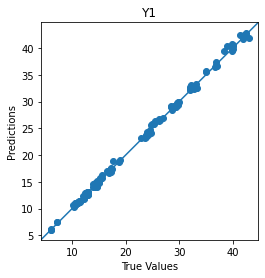

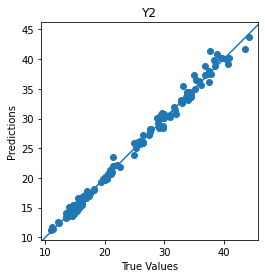

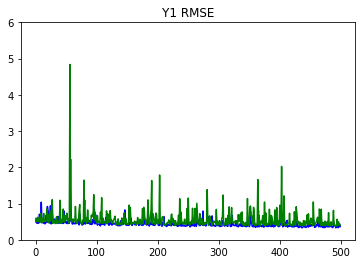

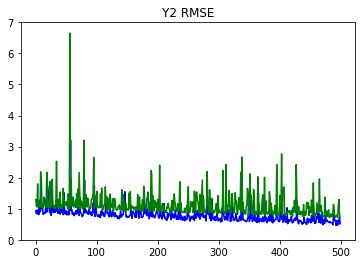

In [20]:
# Plot the loss and mse
Y_pred = model.predict(norm_test_X)
plot_diff(test_y[0], Y_pred[0], title='Y1')
plot_diff(test_y[1], Y_pred[1], title='Y2')
plot_metrics(metric_name='y1_output_root_mean_squared_error', title='Y1 RMSE', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)